In [83]:
import numpy as np
import matplotlib.pyplot as plt

def E_point(x, y, q, x0, y0):
    """
    Devuelvo las componentes Ex y Ey del campo electrico de una carga puntual. 
    params:
        x, y: punto campo
        q: carga
        x0, y0: punto fuente
        
    """
    r = np.sqrt((x-x0)**2+(y-y0)**2)
    Ex = q*(x-x0)/r**3
    Ey = q*(y-y0)/r**3
    return Ex, Ey    



def multiple_charges(x, y, charges_positions):
    """
    Devuelve las componentes Ex y Ey del campo electrico de muchas cargas puntuales. 
    params:
        x, y: punto campo
        charges_positions: una lista con las cargas y posiciones [[q1, x01, y01], ..., [qN, x01, y0N]]
        
    """
    Exs, Eys = [], []
    for data in charges_positions:
        q, x0, y0 = data
        Ex, Ey = E_point(x, y, q, x0, y0)
        Exs.append(Ex)
        Eys.append(Ey)
    
    Ex_total = np.sum(Exs, 0)
    Ey_total = np.sum(Eys, 0)
    
    return Ex_total, Ey_total
    
def multiple_pot(x, y, charges_positions):
    """
    Devuelve el potencial electrico de muchas cargas puntuales. 
    params:
        x, y: punto campo
        charges_positions: una lista con las cargas y posiciones [[q1, x01, y01], ..., [qN, x01, y0N]]
        
    """
    V_list = []
    for data in charges_positions:
        q, x0, y0 = data
        rx = x-x0
        ry = y-y0
        Vi = q/(np.sqrt(rx**2+ry**2)**2)
        V_list.append(Vi)
    V_total = np.sum(V_list, 0)
    
    return V_total
    
    
def plot_charges(charges_positions, ax, text = True):
    """
    Plotea las cargas con circulos.     
    """

    for data in charges_positions:
        q, x0, y0 = data
        c = 'r'
        si = '-'
        if q > 0:
            c = 'b'
            si = '+'
        ax.plot(x0, y0, 'o'+c, markersize = 10)
        if text:
            ax.text(x0-0.4, y0-.1, si + str(q) , color = 'w')


def plot_streamlines(l, N, charges_positions, ax, fig, text = True, line_color = 'w'):
    """
    Plotea las lineas de campo y sups equipotenciales. Hay que darle la figura (fig) y el cuadro (ax) en donde plotear.
    params:
        l: valor máximo del plot. Es decir "x" va de -l a l (la coordenada "y" tambien.)
        N: número de puntos en la grilla (NxN)
    """
    
    x = np.linspace(-l, l, N)
    y = np.linspace(-l, l, N)
    X, Y = np.meshgrid(x, y)

    Ex, Ey = multiple_charges(X, Y, charges_positions)
    pot = multiple_pot(X, Y, charges_positions)

    for i in range(len(x)):
        for j in range(len(y)):
            p = pot[i][j]        
            if p >= 0:
                pot[i][j] = p**(1/10)
            else:
                pot[i][j]= -np.abs(p)**(1/10)

    cp = ax.contourf(X, Y, pot, cmap = 'RdGy', vmin = pot.min()*.5, vmax = pot.max()*.5, levels = 50)
    cb = fig.colorbar(cp, ticks = [pot.min(), 0, pot.max()], fraction=0.046, pad=0.04)


    cb.ax.set_yticklabels(['Vmin', '0', 'Vmax'])
    ax.streamplot(X, Y, Ex, Ey, linewidth=1,
                    density=1, arrowstyle='->', arrowsize=2, color = line_color)
                    
    plot_charges(charges_positions, ax, text)
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_aspect('equal')
    
    
    return Ex, Ey, pot

def plot_pot(l, N, charges_positions, ax, fig, text = True):
    """
    Plotea las lineas de campo y sups equipotenciales. Hay que darle la figura (fig) y el cuadro (ax) en donde plotear.
    params:
        l: valor máximo del plot. Es decir "x" va de -l a l (la coordenada "y" tambien.)
        N: número de puntos en la grilla (NxN)
    """
    
    x = np.linspace(-l, l, N)
    y = np.linspace(-l, l, N)
    X, Y = np.meshgrid(x, y)


    pot = multiple_pot(X, Y, charges_positions)

    for i in range(len(x)):
        for j in range(len(y)):
            p = pot[i][j]        
            if p >= 0:
                pot[i][j] = p**(1/10)
            else:
                pot[i][j]= -np.abs(p)**(1/10)

    cp = ax.contourf(X, Y, pot, cmap = 'RdGy', vmin = pot.min()*.5, vmax = pot.max()*.5, levels = 50)
    cb = fig.colorbar(cp, ticks = [pot.min(), 0, pot.max()], fraction=0.046, pad=0.04)

    cb.ax.set_yticklabels(['Vmin', '0', 'Vmax'])
  
                    
    plot_charges(charges_positions, ax, text)
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_aspect('equal')
    
    
    return pot

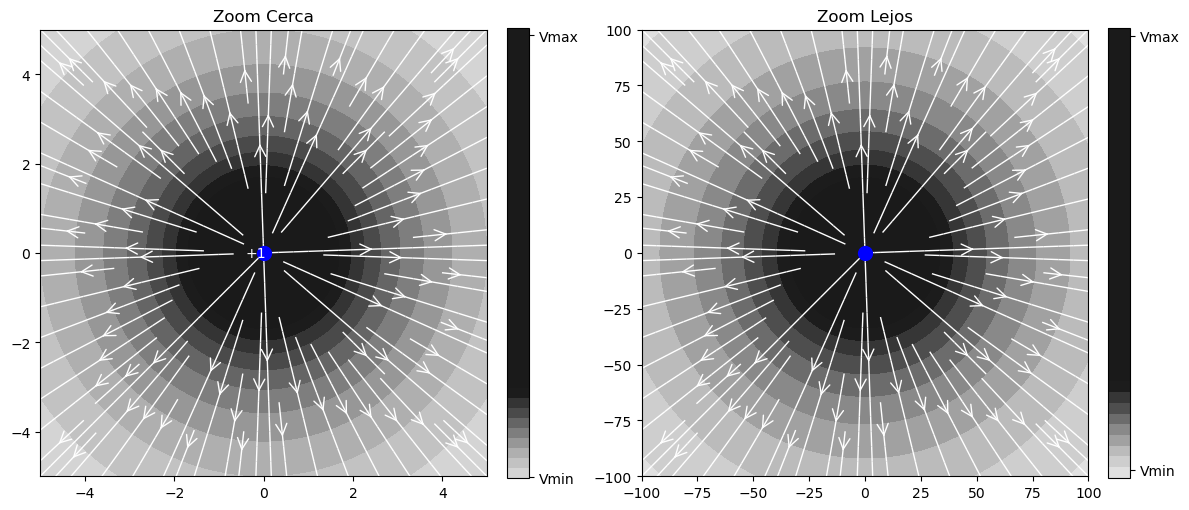

In [84]:
# Una carga puntual
N = 128

charges_positions = [[1, 0, 0]]

plt.figure(1, figsize = (12, 6))
plt.clf()
fig, axs = plt.subplots(1, 2, num = 1)
l = 5
plot_streamlines(l, N, charges_positions, axs[0], fig)
l = 100
plot_streamlines(l, N, charges_positions, axs[1], fig, text = False)
axs[0].set_title('Zoom Cerca')
axs[1].set_title('Zoom Lejos')

plt.tight_layout()

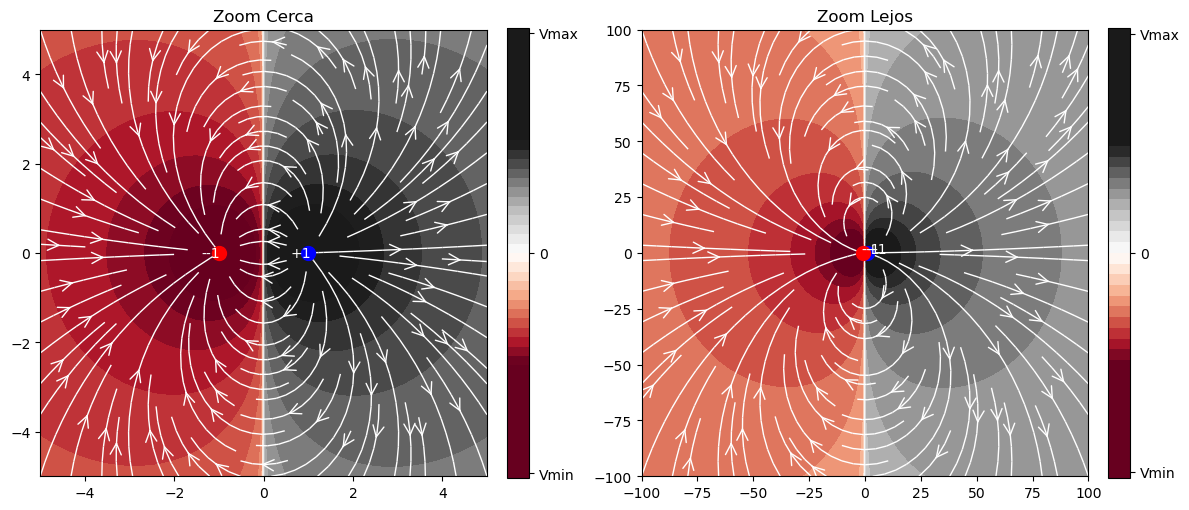

In [85]:
# un dipolo
N = 128
charges_positions = [[1, 1, 0], 
                         [-1, -1, 0],
                         ]

plt.figure(1, figsize = (12, 6))
plt.clf()
fig, axs = plt.subplots(1, 2, num = 1)
l = 5
plot_streamlines(l, N, charges_positions, axs[0], fig)
l = 100
plot_streamlines(l, N, charges_positions, axs[1], fig)
axs[0].set_title('Zoom Cerca')
axs[1].set_title('Zoom Lejos')
plt.tight_layout()

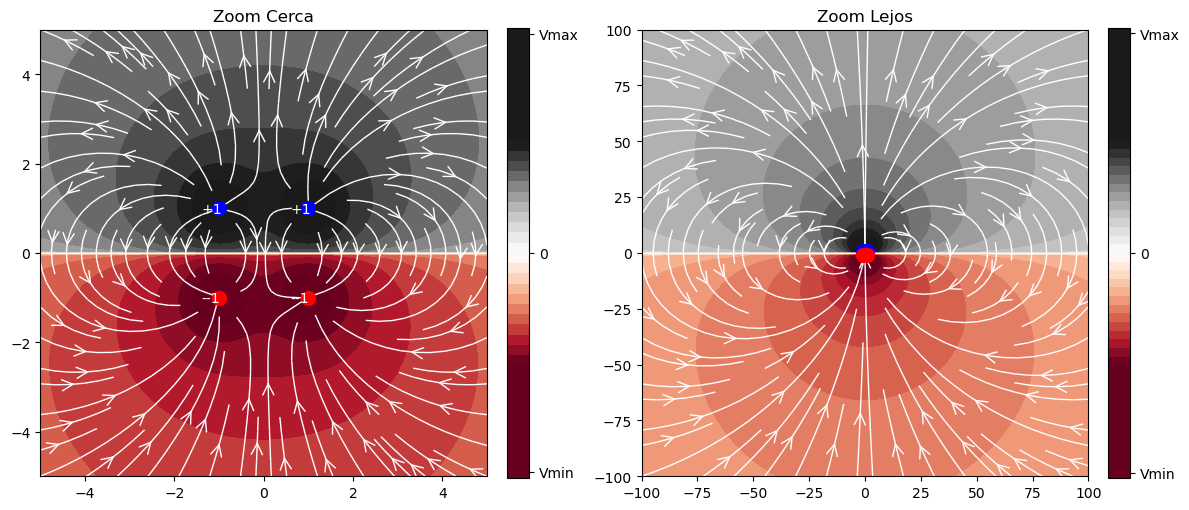

In [86]:
# la distribución del ejercicio 4
N = 128

charges_positions = [[1, 1, 1], 
                        [1, -1, 1],
                        [-1, 1, -1]  ,
                         [-1, -1, -1]
                        ]

plt.figure(1, figsize = (12, 6))
plt.clf()
fig, axs = plt.subplots(1, 2, num = 1)
l = 5
plot_streamlines(l, N, charges_positions, axs[0], fig)
l = 100
plot_streamlines(l, N, charges_positions, axs[1], fig, text = False)
axs[0].set_title('Zoom Cerca')
axs[1].set_title('Zoom Lejos')
plt.tight_layout()

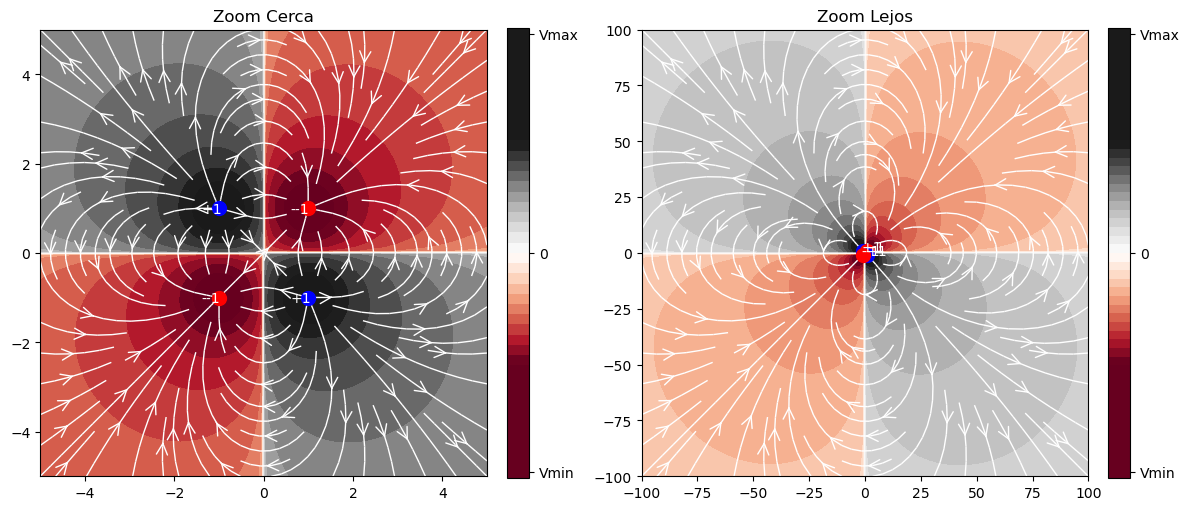

In [87]:
# Acá una distribución cuadrupolar! 
charges_positions = [[1, -1, 1], 
                         [-1, 1, 1],
                         [1, 1, -1], 
                         [-1, -1, -1]
                         ]

plt.figure(1, figsize = (12, 6))
plt.clf()
fig, axs = plt.subplots(1, 2, num = 1)
l = 5
plot_streamlines(l, N, charges_positions, axs[0], fig)
l = 100
plot_streamlines(l, N, charges_positions, axs[1], fig)
axs[0].set_title('Zoom Cerca')
axs[1].set_title('Zoom Lejos')
plt.tight_layout()
    

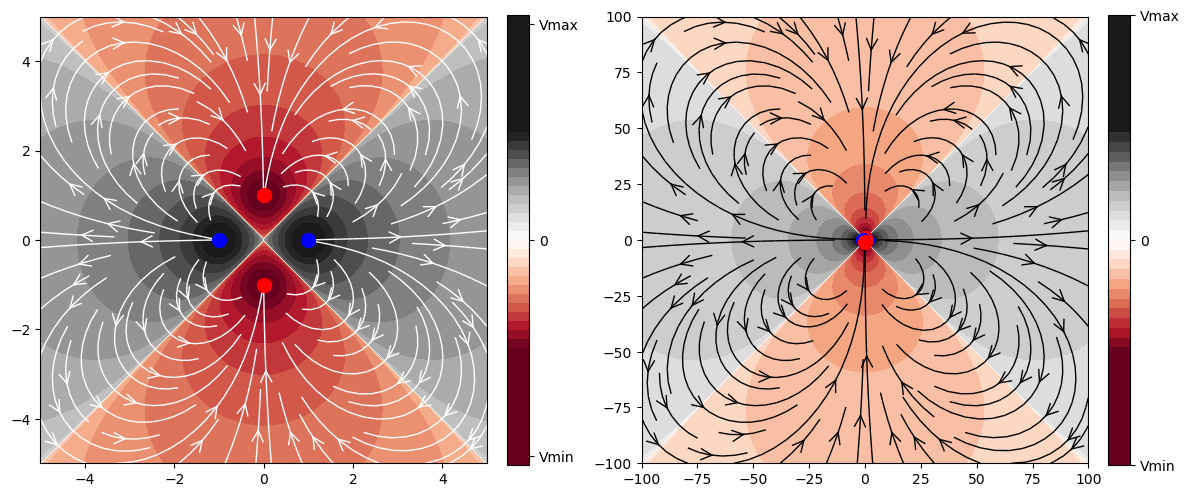

In [88]:
# haga su propio multipolo de orden n (¿Que pasa si n es impar?)
n = 4


N = 512
charges_positions = []
for k in range(n):
    x0, y0 = np.cos(2*np.pi/n*k), np.sin(2*np.pi/n*k)
    q = (-1)**k
    charges_positions.append([q, x0, y0])

plt.figure(1, figsize = (12, 6))
plt.clf()
fig, axs = plt.subplots(1, 2, num = 1)
l = 5
plot_streamlines(l, N, charges_positions, axs[0], fig, text = False)
l = 100
plot_streamlines(l, N, charges_positions, axs[1], fig, text = False, line_color = 'k')

plt.tight_layout()